## 1. Azure Databricks Overview



## What is Azure Databricks?
- Azure Databricks is a unified data analytics platform built on Apache Spark.
- Available on Microsoft Azure as a **first-party service**.
- Simplifies working with Spark by managing infrastructure, optimizations, and collaboration tools.

## Key Features of Databricks:
- Powered by **Apache Spark**, a fast, unified analytics engine for big data and machine learning.
- Developed by the creators of Apache Spark.
- Supports batch and streaming workloads.
- Built-in libraries for SQL, ML, and graph processing.



## Why Apache Spark?
- Developed at UC Berkeley (2009), open-sourced in 2010.
- Faster and more interactive than Hadoop.
- Uses in-memory computing for speed (up to 100x faster than Hadoop).
- Handles petabytes of data; used by Yahoo, Netflix, eBay, etc.



## How Databricks Enhances Spark:
- **Easy cluster management**: Spin up clusters in clicks.
- **Databricks Runtime**: Optimized Spark runtime (up to 5x faster).
- **Photon Engine**: Vectorized query engine (up to 8x faster).
- **Notebook-based IDE**: Built-in Jupyter-style notebooks.
- **Security**: Role-based access and SSO via Microsoft Entra ID.



## Core Components of Databricks:
- **Delta Lake**: Supports ACID transactions for reliable data.
- **Delta Live Tables**: Declarative ETL framework for building pipelines.
- **Databricks Workflows**: For orchestration and scheduling.
- **Databricks SQL**: SQL warehouse for analysts, dashboards, scheduling.
- **Unity Catalog**: Central governance, metadata, and data lineage.
- **Managed MLflow**: ML lifecycle management (experiment, register, deploy models).
- **Databricks IQ**: AI assistant for coding, commenting, and dashboarding.



## Azure Integration Highlights:
- Hosted as a **first-party service** on Azure.
- Unified billing and support through Microsoft.
- Connectors to Azure services: Data Lake Gen2, SQL, Synapse, Cosmos DB.
- Messaging integration: IoT Hub, Event Hub.
- Azure-native VM provisioning for clusters.
- Monitoring with Azure Monitor.
- CI/CD via Azure DevOps.



## Summary
Azure Databricks combines the power of Apache Spark with Azure's cloud ecosystem to provide a scalable, secure, and collaborative data platform for big data and AI workloads.


## 2. Azure Databricks Architecture

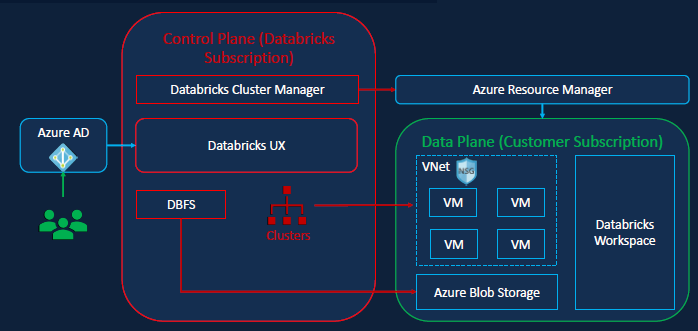

In [6]:
from IPython.display import Image
Image('./img/adb.png')


#### Key Architectural Concepts

Azure Databricks architecture is split into two main components:

#### 1. Control Plane
- Managed by **Databricks** in its own subscription.
- Hosts:
  - Databricks **User Interface (UX)**
  - **Cluster Manager**
  - **Metadata**: Information about clusters, files, mounts, etc.
  - **Databricks File System (DBFS)**: Stores notebooks and temporary results.

#### 2. Data Plane
- Resides in the **Customer’s Azure Subscription**.
- Hosts compute (VMs) and storage resources used during processing.


#### Resources Created in Customer Subscription

When a Databricks workspace is created, the following resources are provisioned:

1. **Databricks Workspace**: UI and entry point for using Databricks.
2. **Virtual Network (VNet)**: Network for the compute clusters.
3. **Network Security Group (NSG)**: Security controls for the VNet.
4. **Azure Blob Storage (DBFS root)**: Default storage account (temporary storage).

These are created automatically by Databricks, even though they reside in the customer's subscription.


#### Data Access and Security

- Users (Data Engineers, Scientists, Analysts) authenticate using **Azure Active Directory SSO**.
- When a user starts a cluster:
  - The **Cluster Manager** provisions VMs via **Azure Resource Manager**.
  - These VMs are placed in the customer's **VNet**.

- **Data stays within the customer's subscription.**
  - Compute happens within customer's VNet.
  - Temporary outputs are stored in default blob storage (DBFS root).
  - Permanent data should be stored in mounted external storage (recommended).

> The default DBFS root is **not recommended** for long-term storage.


#### Summary

- Databricks separates control and data responsibilities using Control Plane and Data Plane.
- All **data processing** and **data storage** happen inside your own subscription.
- Databricks simplifies infrastructure while keeping your data secure and compliant.


## Section 4: Databricks Clusters


#### What is a Databricks Cluster?
- A **Databricks Cluster** is a set of computation resources and configurations on which you run data engineering, data science, and machine learning tasks.
- It consists of **driver** and **worker nodes** provisioned on virtual machines (VMs) within your Azure subscription.


#### Types of Clusters in Azure Databricks

1. **All-Purpose Clusters**
   - Interactive and collaborative use (e.g. notebooks, ad-hoc queries).
   - Used by data scientists, analysts, and engineers.

2. **Job Clusters**
   - Dedicated for automated job runs (scheduled or triggered via APIs).
   - Automatically terminates after job completion to save cost.


#### Cluster Configuration Options

- **Cluster Mode**: Standard, High Concurrency, or Single Node.
- **Databricks Runtime Version**: Choose based on Spark version, GPU support, ML libraries, etc.
- **Node Types**: Choose VM size (memory-optimized, compute-optimized, etc.).
- **Autoscaling**: Automatically adjusts number of worker nodes.
- **Auto Termination**: Shutdown cluster after inactivity (cost-saving).
- **Tags**: Add metadata for billing and governance.


#### Choosing the Right Cluster Configuration

- Match cluster type to workload:
  - Use **All-Purpose** for development and experimentation.
  - Use **Job Clusters** for production jobs.
- Select VM types based on data size, memory requirements, and workload type.
- Use autoscaling and auto-termination for cost efficiency.


#### Pricing and Cost Control

- Billed per **DBU (Databricks Unit)** per hour + Azure VM cost.
- DBU rates depend on runtime version (standard vs photon vs GPU).
- Cluster cost = DBUs × time used + VM cost.

#### Cost Control Tips:
- Use **auto-termination**.
- Prefer **Job Clusters** for non-interactive jobs.
- Monitor usage via Azure Cost Management.


#### Advanced Topics (Admin-Focused)

#### Cluster Pools
- Pools reduce cluster start time by pre-allocating VMs.
- Helps reduce cost by reusing idle VMs.
- Allows faster scaling for job workloads.

#### Cluster Policies
- Predefine configuration rules and limits.
- Improve user experience and standardization.
- Enforce cost control and governance.


#### Summary

- Databricks Clusters are fundamental to executing any workloads in Databricks.
- Proper configuration is crucial for performance and cost management.
- Use tools like Cluster Pools and Cluster Policies for optimization and governance.


#### Databricks Cluster Types and Usage

#### Cluster Basics

- A **cluster** is a collection of **virtual machines (VMs)** working together as a single compute engine.
- Every cluster has:
  - A **Driver Node**: Orchestrates task execution.
  - One or more **Worker Nodes**: Execute the tasks assigned by the driver.
- Databricks clusters run various workloads like:
  - ETL/Data Engineering
  - Data Science
  - Machine Learning


#### Cluster Types

#### 1. All-Purpose Clusters
- Created manually (GUI, CLI, or API).
- **Persistent**: Can be started/stopped and reused.
- Supports **collaborative** and **interactive** workloads.
- Can be **shared** among multiple users.
- Suitable for **ad-hoc analysis** and exploratory work.
- **More expensive** than job clusters.

#### 2. Job Clusters
- Created automatically **when a job starts**.
- **Temporary**: Destroyed after the job completes.
- **Cannot be restarted** after termination.
- Ideal for **automated ETL** and **recurring workflows**.
- **Isolated** for each job run.
- **Cost-efficient** for production workloads.


#### Cluster Creation in Workspace

- Navigate to the **Compute** tab in the Databricks workspace sidebar.
- Tabs available:
  - **All Purpose Compute**: Create/edit persistent clusters.
  - **Job Compute**: View job clusters used in workflows.
  - **Pools**: Configure reusable VM resources.
  - **Policies**: Available on Premium tier for restricting cluster creation.

> **Note**: Job clusters cannot be manually created—they are launched by workflows.


#### Cluster Pools (Brief Intro)
- Reduce **cluster startup time** (normally 5–6 minutes).
- Maintain **pre-allocated** compute capacity.
- Helps improve responsiveness for interactive users.

#### Cluster Policies (Brief Intro)
- Define **pre-configured templates** for cluster creation.
- Restrict configurations to **control cost** and enforce best practices.
- Simplifies cluster setup for users.


#### Creating Clusters

- **All Purpose Cluster**:
  - Use **Create Compute** in All Purpose Compute tab.
  - Specify configurations (e.g., node type, runtime, scaling, termination).

- **Job Cluster**:
  - Automatically created when a **job runs**.
  - Created via the **Workflows** tab → Create Job → New Job Cluster.


#### Summary

- All Purpose Clusters are ideal for development, exploration, and collaboration.
- Job Clusters are lightweight, automated, and best suited for production jobs.
- Pools and Policies help manage performance and cost.


- https://azure.microsoft.com/en-gb/pricing/details/virtual-machines/linux/#pricing
- https://azure.microsoft.com/en-gb/pricing/details/databricks/

## Section 5: Databricks Notebooks
- <b>what is a notebook</b> : a notebook is a collection of cells that run commands on a databricks cluster
- <b>Creating a notebook</b>
- <b>Magic Commands</b> : https://www.markdownguide.org/cheat-sheet/#basic-synta
- <b>Databricks Utilities</b>
- <b>Import Project Solution Notebooks</b>